# Implement PaddlePaddle Graph PGL 


Create a graph with numpy.

Convert it into paddle.Tensor .

Do send recv for graph neural network.

In [18]:
# Code 1
import pgl
import paddle
import numpy as np


num_nodes = 5
edges = [(0, 1), (1, 2), (3, 4)]
feature = np.random.randn(5, 6).astype(np.float32)

# print(feature)

g = pgl.Graph(num_nodes=num_nodes,
    edges=edges,
    node_feat={
        "h": feature
    })

print(" g.tensor() :\n",g.tensor())

def send_func(src_feat):
    return src_feat

def recv_func(msg):
    return msg.reduce_sum(msg["h"])

msg = g.send(send_func, src_feat=g.node_feat)

print("msg :\n",msg)

ret = g.recv(recv_func, msg)
print("ret :\n",ret)

 g.tensor() :
 {"class": "Graph", "num_nodes": 5, "edges_shape": [3, 2], "node_feat": [{"name": "h", "shape": [5, 6], "dtype": "paddle.float32"}], "edge_feat": []}
msg :
 {}
ret :
 Tensor(shape=[5, 6], dtype=float32, place=CPUPlace, stop_gradient=True,
       [[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.09185073,  1.05368972, -0.56613213,  1.55583906,  0.87901366, -0.81917828],
        [ 0.23137024, -0.05853562,  0.58775187,  0.51961970,  2.06692648,  1.35394073],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.58650517, -0.73775339, -1.45752442,  0.44510791,  0.65541273,  0.59233290]])


Code 2:
Create a graph with paddle.Tensor.

Do send recv for graph neural network.


In [33]:
import paddle
import pgl

num_nodes = 5
edges = paddle.to_tensor([ (0, 1), (1, 2), (3, 4)])
feature = paddle.randn(shape=[5, 6])
edge_feature = paddle.randn(shape=[3, 6])
graph = pgl.Graph(num_nodes=num_nodes,
            edges=edges,
            node_feat={
                "feature": feature
            },
            edge_feat={
                "edge_feature": edge_feature
            })

model = pgl.nn.GCNConv(6, 6)
out = model(graph, graph.node_feat["feature"])

print("Graph:\n",graph)
print("_______________________")
print("Model:\n",model)
print("_______________________")
print("out:\n",out)


Graph:
 {"class": "Graph", "num_nodes": 5, "edges_shape": [3, 2], "node_feat": [{"name": "feature", "shape": [5, 6], "dtype": "paddle.float32"}], "edge_feat": [{"name": "edge_feature", "shape": [3, 6], "dtype": "paddle.float32"}]}
_______________________
Model:
 GCNConv(
  (linear): Linear(in_features=6, out_features=6, dtype=float32)
)
_______________________
out:
 Tensor(shape=[5, 6], dtype=float32, place=CPUPlace, stop_gradient=False,
       [[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.06639445, -1.23663890,  1.03784406, -0.73342884,  0.38160542, -1.55153561],
        [-0.35825759,  1.54828119, -1.93157673,  0.97122401, -0.29368937,  2.10742211],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
        [-1.31870973,  0.78955203, -2.41830254,  0.72151381, -0.41591209,  1.94382131]])


Draw graph using matplotlib

In [25]:
from matplotlib import pyplot as plt

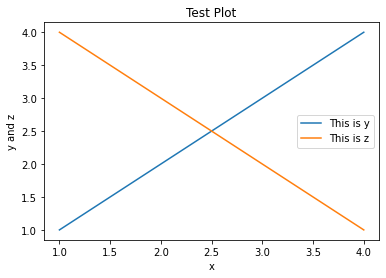

In [29]:
x = [1,2,3,4]
y = [1,2,3,4]
z = [4,3,2,1]
plt.plot(x,y)
plt.plot(x,z)
plt.title("Test Plot")
plt.xlabel("x")
plt.ylabel("y and z")
plt.legend(["This is y","This is z"])
plt.show()